Bank Marketing Campaign
======================

# Data Glacier Online Virtual Internship
## Presented by The Greeks
### Mihalis Galanakis, Aggelos Konioris, Giorgos Moysiadis

# Introduction

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.
A Portuguese retail bank was addressed, with data collected from 2008 to 2013, thus including the effects of the 2008
financial crisis.

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in
order to access if the product (bank term deposit) would be **('yes')** or not **('no')** subscribed.

The classification goal is to predict if the client will subscribe a term deposit (variable y).

### What is Term Deposit?

Term deposit is deposit account where money is **"locked up"** for some period of time, which ranges from few months to
years.
However, as a tradeoff to money being locked up, term deposit offers higher interest rate than traditional, liquid
savings accounts. Early termination (withdrawl of money) is often associated with penalties.

So basically the client is asked to lock his money and not be able to use it for future purchases or general use. So we
have to take into consideration that the clients were asked, during a global financial crisis, to deposit their money in
order to generate profit for the future, so during our Exploratory Analysis we will see that a lot of people hesistated
to accept the offer.

## Dataset Information

### Attribute Information:
**Bank client data:**
- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
    'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced
    or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course',
    'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical:  'no', 'yes','unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**Related with the last contact of the current campaign:**
- Contact: contact communication type (categorical: 'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target
(e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the
call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if
the intention is to have a realistic predictive model.

**Other attributes:**
- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means
client was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
**Social and economic context attributes:**
- Emp.var.rate: employment variation rate - quarterly indicator (numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

## Focus Points

* We will focus on feature engineering, which is a key aspect, and propose generic social and economic indicators for
whether or not a client will accept the offer or not.
* We will compare different modeling Machine Learning techniques and show how the best model could benefit the bank
telemarketing business.

# Importing libraries

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

# for reproducibility
SEED = 0

Apart from filling the missing values we will create also another copy of the dataset without replacing the `unknown`
values in the attributes in order to see whether or not it will affect out models' performance.

In [2]:
na_df = pd.read_csv('data/bank-additional-full.csv', delimiter=';')
df = pd.read_csv('data/bank-additional-full.csv', delimiter=';', na_values=['unknown'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [5]:
df['y'] = df.apply(lambda row: 1 if row['y'] == 'yes' else 0, axis=1)

We are going to create a method that will randomly fill the missing values in our data, so that we will try to create a
more "balanced" dataset.

In [6]:
def na_randomfill(function):
    na = pd.isnull(function)
    number_null = na.sum()
    if number_null == 0:
        return function
    fill_values = function[~na].sample(n=number_null, replace=True, random_state=SEED)
    fill_values.index = function.index[na]

    return function.fillna(fill_values)

###  Fill the missing values with the appropriate method in each case.

In [7]:
df['loan'].fillna(df['loan'].value_counts().index[0], inplace = True)
df['marital'].fillna(df['marital'].value_counts().index[0], inplace = True)
df['default'].fillna(df['default'].value_counts().index[0], inplace = True)

df = df.apply(na_randomfill)
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Finally, we have zero missing values!**

Next, we are going to visualize the distributions and how much of the data is filled with outliers that we may or may
not, later on, remove from our dataset in the modeling phase.

We are creating a function that will create both a basic distribution plot, and a plotbox, which is a standardized way
of displaying the distribution of data based minimum/maximum, median values, and it can also tell us if our data is
symmetrical, how tightly our data is grouped, and if and how our data is skewed.

In [8]:
def boxplot(attribute):
    values = df[attribute]
    mean = np.array(values).mean()
    median = np.median(values)

    f, (ax_box, ax_hist) = plt.subplots(2, sharex='col', gridspec_kw={'height_ratios': (0.5, 2)})

    sns.boxplot(values, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.set(xlabel='')
    ax_box.set_title('Distribution of {}'.format(attribute), fontsize=17)

    sns.distplot(values, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    plt.legend({'Mean':mean,'Median':median})
    plt.show()

## The abnormality of the data

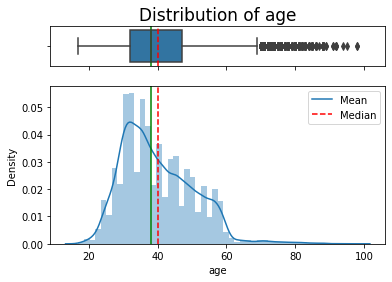

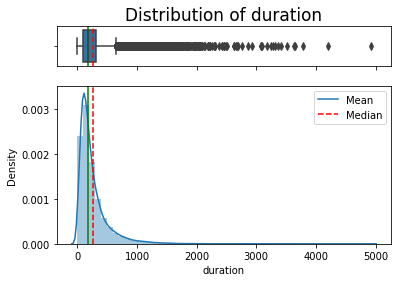

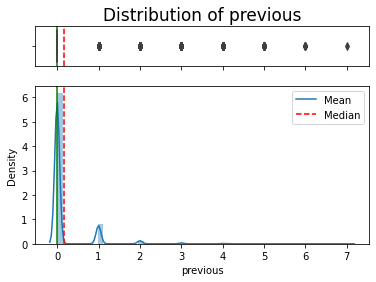

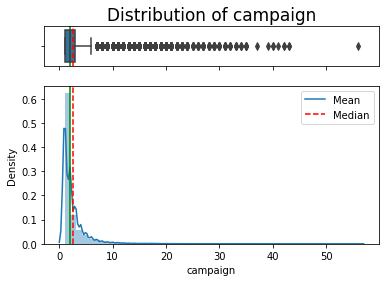

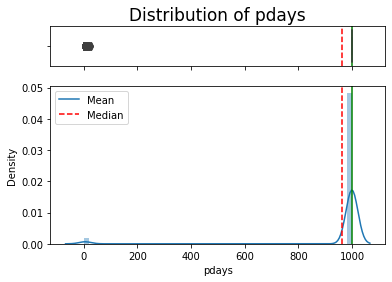

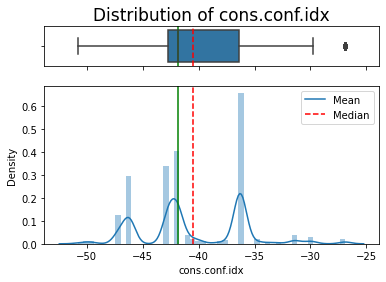

In [9]:
outliers = ['age', 'duration', 'previous', 'campaign', 'pdays', 'cons.conf.idx']
for out in outliers:
    boxplot(out)

As it can be seen from the graphs above we have very unbalanced data, following no normal distribution and with a lot of
outliers.

Marital and Educational status

[Text(0, 0, 'basic.4y'),
 Text(1, 0, 'high.school'),
 Text(2, 0, 'basic.6y'),
 Text(3, 0, 'basic.9y'),
 Text(4, 0, 'professional.course'),
 Text(5, 0, 'university.degree'),
 Text(6, 0, 'illiterate')]

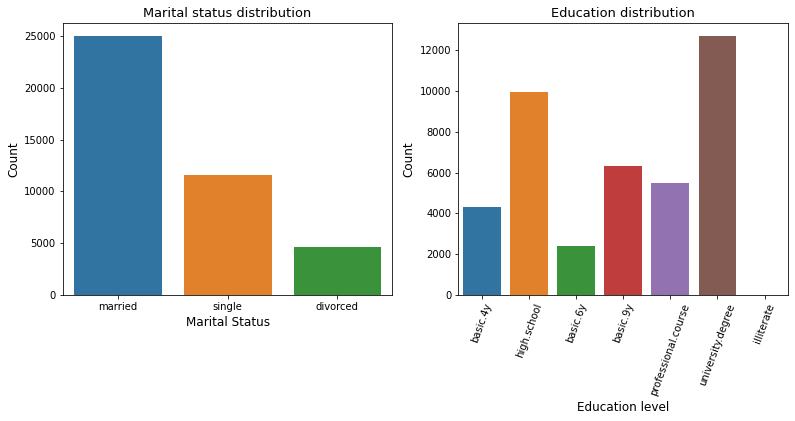

In [10]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

# First plot for marital status
sns.countplot(x='marital', data=df, ax=ax1)
ax1.set_title('Marital status distribution', fontsize=13)
ax1.set_xlabel('Marital Status', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# Second plot for Education distribution
sns.countplot(x='education', data=df, ax=ax2)
ax2.set_title('Education distribution', fontsize=13)
ax2.set_xlabel('Education level', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)

Job distribution

Text(0.5, 1.0, 'Job Count Distribution')

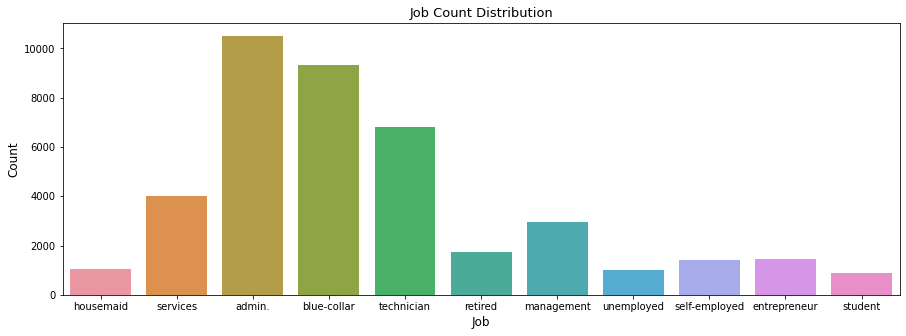

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
sns.countplot(x='job', data=df)
ax.set_xlabel('Job', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Job Count Distribution', fontsize=13)

Text(0.5, 1.0, 'Deposit Distributions \n (0: No || 1: Yes)')

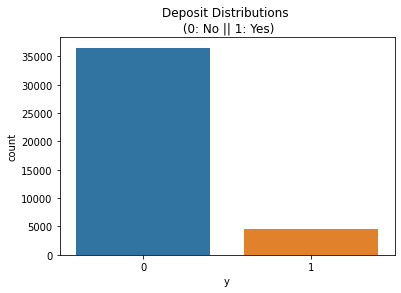

In [12]:
sns.countplot('y', data=df)
plt.title('Deposit Distributions \n (0: No || 1: Yes)')

As it was pointed out in the introduction section, we can see that around 11% of the customers that were contacted
accepted the offer for term deposit

In [13]:
df.groupby(['education', 'y']).job.count()

education            y
basic.4y             0     3884
                     1      457
basic.6y             0     2185
                     1      200
basic.9y             0     5804
                     1      518
high.school          0     8850
                     1     1096
illiterate           0       14
                     1        4
professional.course  0     4858
                     1      617
university.degree    0    10953
                     1     1748
Name: job, dtype: int64

We are going to group the whole data set by `y`

In [14]:
dfgrouped = df.groupby('y')

- We are going to take all to categorical attributes and show how which customer decided for term deposit or not.
- We are going to group them by whether they answered "yes" or "no" and show what was their job, educational background
etc.

In [15]:
obj_column = df.dtypes[df.dtypes == 'object'].index
obj_column

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

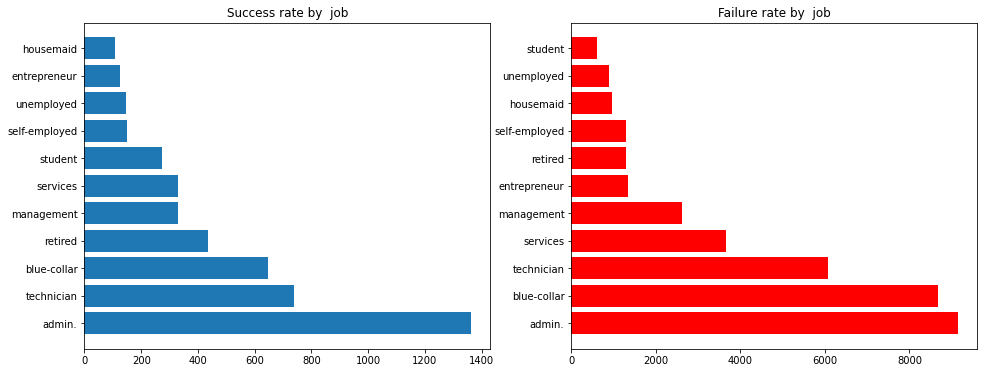

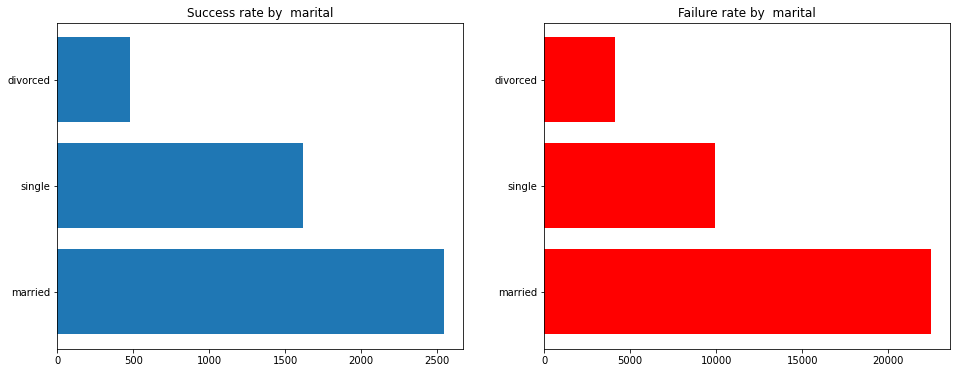

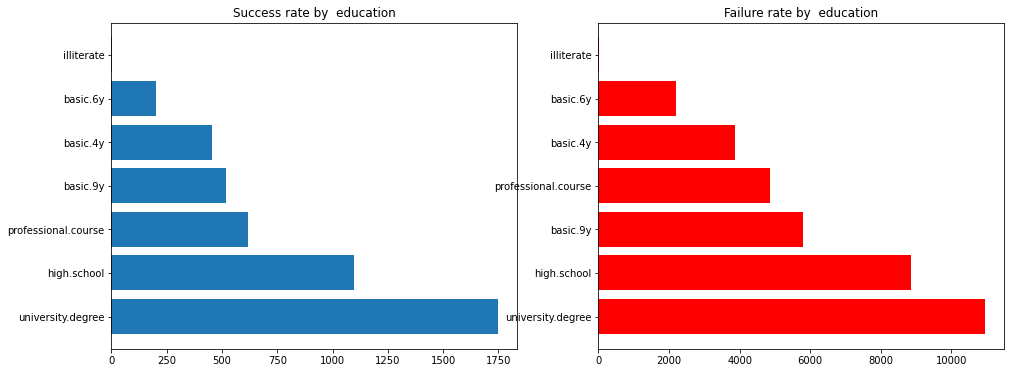

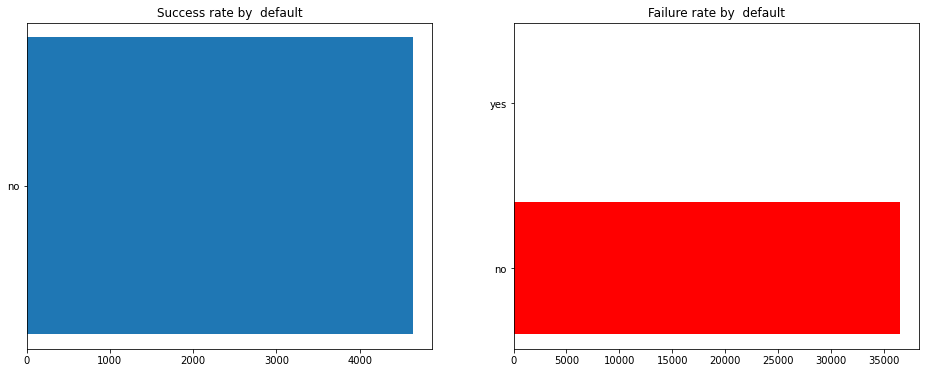

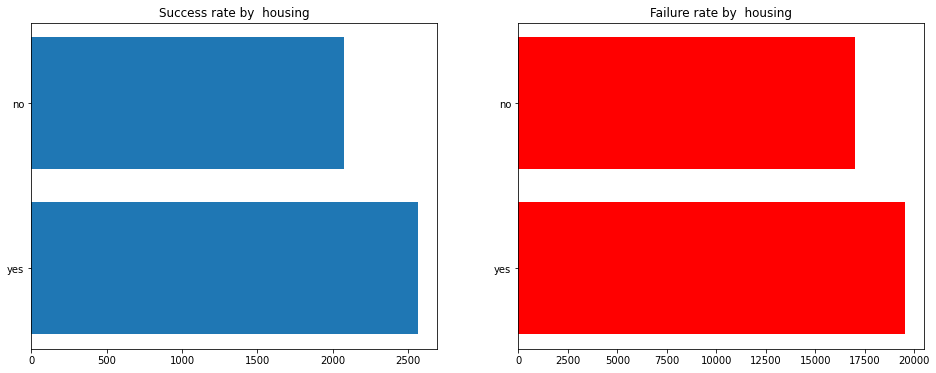

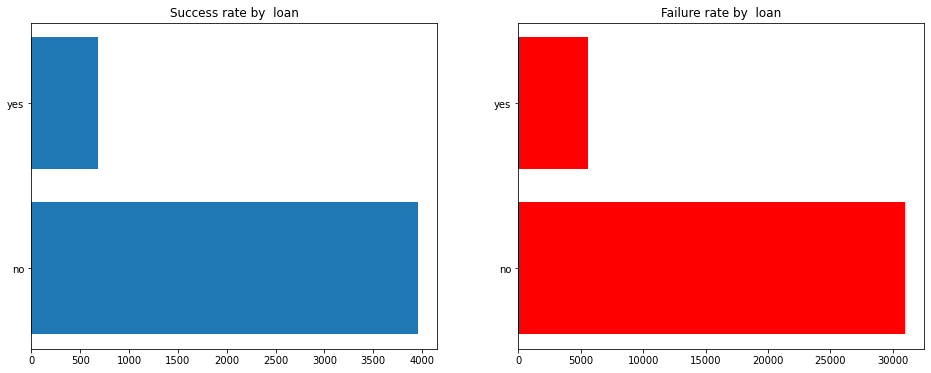

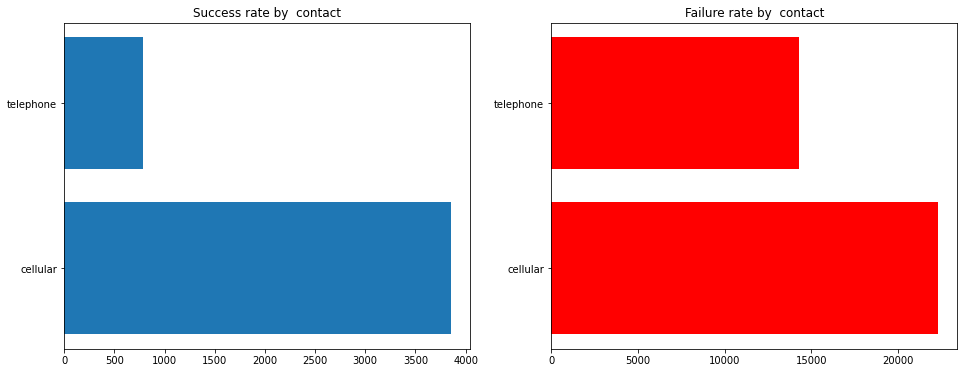

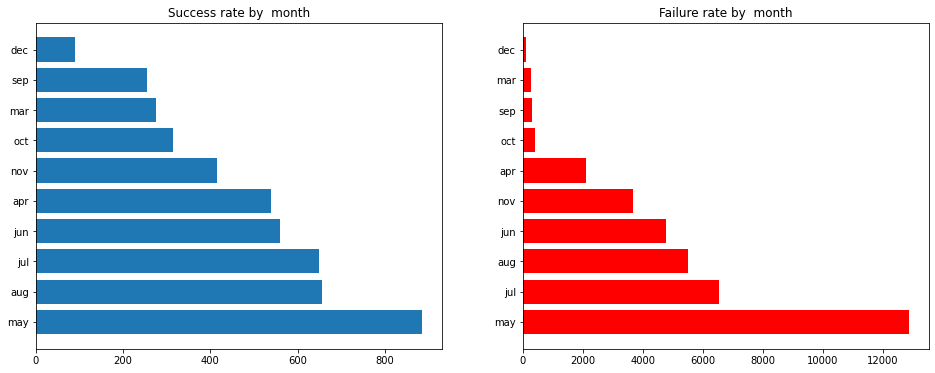

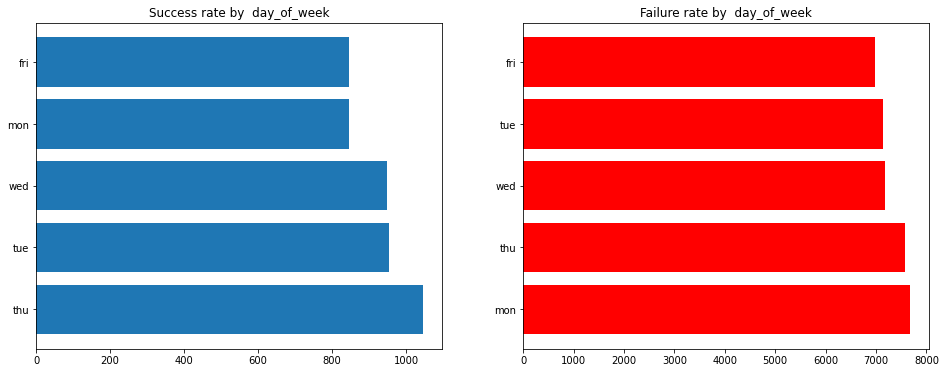

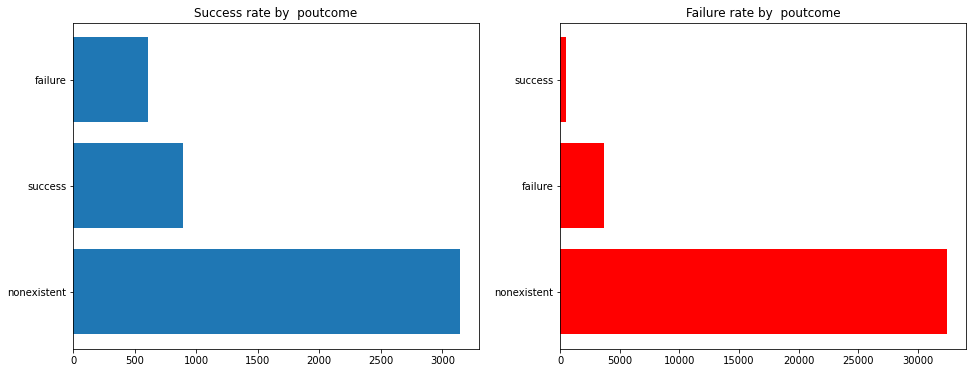

In [16]:
for column in obj_column:

    yes = dfgrouped.get_group(1)[column].value_counts()
    no = dfgrouped.get_group(0)[column].value_counts()

    plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    plt.title(f'Success rate by  {column}')
    plt.barh(yes.index, width=yes.values)

    plt.subplot(1,2,2)
    plt.title(f'Failure rate by  {column}')
    plt.barh(no.index, width=no.values, color='red')
    plt.show()
    print()

Transform the categorical columns from `object` to numerical values so that our models can use them.

In [17]:
labelencoder_X = LabelEncoder()
for column in obj_column:
    df[column] = labelencoder_X.fit_transform(df[column])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


<AxesSubplot:>

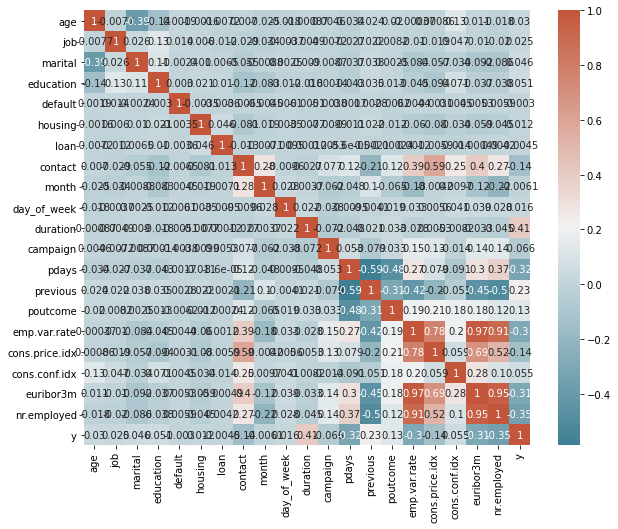

In [18]:
# isws de xreiazetai?

corr = df.corr()
_, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True), ax=ax)

Create the appropriate train and test data with 30% of the data used for test, and we are going to be using a "global"
variable `SEED` in order to be able to reproduce the results and see for any improvements.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y',axis=1), df['y'], test_size=.3, random_state = SEED,
                                                    stratify= df['y'])

Rescale our data from their default range to `0-1` range.

In [20]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
models = [DecisionTreeClassifier(), RandomForestClassifier(), SVC()]

for model in models:
  m = model.fit(X_train,y_train)
  print(model.__class__.__name__, 'report:')
  print('Train accuracy score', round(model.score(X_train,y_train), 2))
  print('Test accuracy score', round(model.score(X_test,y_test), 2))
  print()
  print('Train confusion matrix:\n', confusion_matrix(y_train, model.predict(X_train)))
  print('\nTest confusion matrix:\n', confusion_matrix(y_test, model.predict(X_test)))
  print()

DecisionTreeClassifier report:
Train accuracy score 1.0
Test accuracy score 0.89

Train confusion matrix:
 [[25583     0]
 [    0  3248]]

Test confusion matrix:
 [[10234   731]
 [  637   755]]

RandomForestClassifier report:
Train accuracy score 1.0
Test accuracy score 0.91

Train confusion matrix:
 [[25583     0]
 [    0  3248]]

Test confusion matrix:
 [[10588   377]
 [  688   704]]

SVC report:
Train accuracy score 0.91
Test accuracy score 0.9

Train confusion matrix:
 [[25262   321]
 [ 2408   840]]

Test confusion matrix:
 [[10805   160]
 [ 1071   321]]

